# TIME SERIES ANALYSIS AND FORECASTING PROJECT PAPER
           DSA 8202

# ALGORITHMIC MOMENTUM TRADING STRATEGY
            BY:
            Student Name: Kanini Kagendo Gichuyia
            Student Number: 149810

# INTRODUCTION

# METHODOLOGY

# ABOUT THE DATA

# IMPORTING THE NECESSARY LIBRARIES & PACKAGES

In [1]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

%matplotlib inline
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure, show

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import cluster, decomposition, pipeline, preprocessing

import statsmodels
import datetime
from datetime import datetime

import statsmodels.api as sm
from pylab import rcParams
from math import sqrt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

# LOADING THE DATA INTO A DATA FRAME & EDA

In [2]:
df=pd.read_csv("C:\\Users\\HP\\Desktop\\Kan's Shindigs\\STRATHMORE\Module 2\\Classwork\\Time Series Analysis & Forecasting\\TSAF Project Paper\\TSLA.csv",index_col=0,parse_dates=True)
df.head()

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2017-03-01  14.324000  14.688667  14.064000  14.466000  14.466000   88849500
2017-04-01  14.316667  15.200000  14.287333  15.132667  15.132667  168202500
2017-05-01  15.094667  15.165333  14.796667  15.116667  15.116667   88675500
2017-06-01  15.128667  15.354000  15.030000  15.267333  15.267333   82918500
2017-09-01  15.264667  15.461333  15.200000  15.418667  15.418667   59692500

In [3]:
#Checking for missing values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
#Obtaining the descriptive statistics of the Data
df.describe()

Open         High          Low        Close    Adj Close  \
count  1529.000000  1529.000000  1529.000000  1529.000000  1529.000000   
mean    113.682998   116.288805   110.804587   113.595513   113.595513   
std     114.735070   117.366979   111.741242   114.560658   114.560658   
min      12.073333    12.445333    11.799333    11.931333    11.931333   
25%      20.587334    20.958000    20.208668    20.588667    20.588667   
50%      31.580000    32.950668    30.224001    31.270666    31.270666   
75%     223.333328   228.433334   217.333328   222.846664   222.846664   
max     411.470001   414.496674   405.666656   409.970001   409.970001   

             Volume  
count  1.529000e+03  
mean   1.270646e+08  
std    8.525347e+07  
min    2.940180e+07  
25%    7.352400e+07  
50%    9.967440e+07  
75%    1.481535e+08  
max    9.140820e+08

In [5]:
#Obtaining the shape of the data
df.shape

(1529, 6)

# VISUALIZATION OF THE DATA

## Plotting of the time series data to visualize the Trend

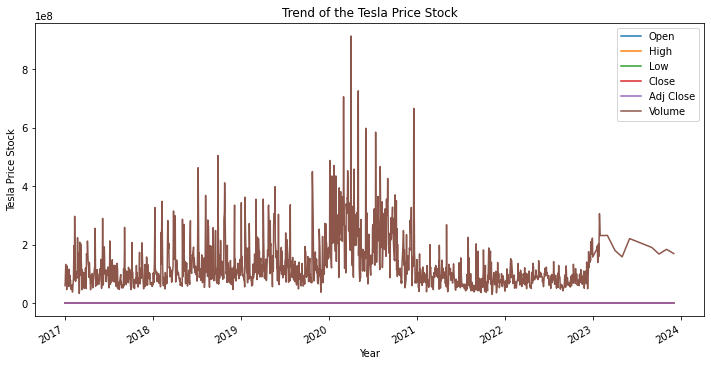

In [6]:
df.plot(figsize=(12,6))
plt.xlabel('Year')
plt.ylabel('Tesla Price Stock')
plt.title('Trend of the Tesla Price Stock')
plt.show()

## Plotting the Pairplot 

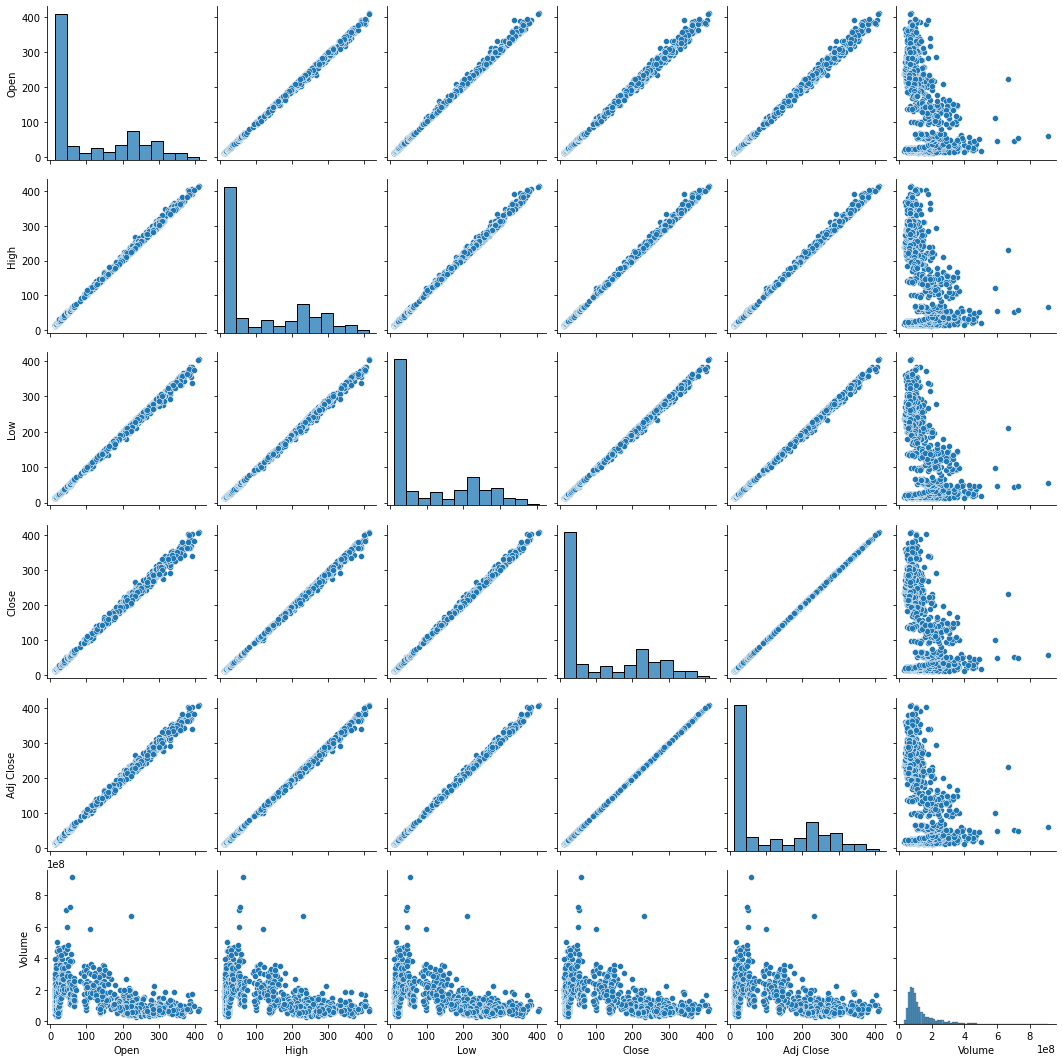

In [7]:
import seaborn as sns
sns.pairplot(df)

Helps understand the best set of features to explain the relationship between the variables. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

In [8]:
#same dataset without parsing the dates for ease of manipulation.
df1=pd.read_csv("C:\\Users\\HP\\Desktop\\Kan's Shindigs\\STRATHMORE\Module 2\\Classwork\\Time Series Analysis & Forecasting\\TSAF Project Paper\\TSLA.csv")

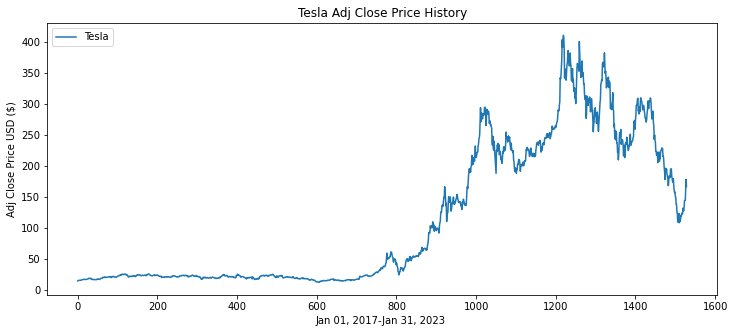

In [9]:
plt.figure(figsize=(12, 5))
plt.plot(df1['Adj Close'], label='Tesla')
plt.title('Tesla Adj Close Price History')
plt.xlabel("Jan 01, 2017-Jan 31, 2023 ")
plt.ylabel("Adj Close Price USD ($)")
plt.legend(loc="upper left")
plt.show()

# IMPLEMENTING THE MOMENTUM STRATEGY

In [10]:
# Calculation of momentum

df1['momentum'] = df1['Close'].pct_change()

In [11]:
# Creating subplots to show momentum and buying/selling markers

figure = make_subplots(rows=2, cols=1)
figure.add_trace(go.Scatter(x=df1.index, 
                         y=df1['Close'], 
                         name='Close Price'))
figure.add_trace(go.Scatter(x=df1.index, 
                         y=df1['momentum'], 
                         name='Momentum',
                         yaxis='y2'))

figure.update_layout(title='Subplots showing the Close Price(blue) and Momentum(red)',
                  xaxis_title='Date',
                  yaxis_title='Price')

In [12]:
# Adding the buy and sell signals
figure.add_trace(go.Scatter(x=df1.loc[df1['momentum'] > 0].index, 
                         y=df1.loc[df1['momentum'] > 0]['Close'], 
                         mode='markers', name='Buy',
                         marker=dict(color='green', symbol='triangle-up')))

figure.add_trace(go.Scatter(x=df1.loc[df1['momentum'] < 0].index, 
                         y=df1.loc[df1['momentum'] < 0]['Close'], 
                         mode='markers', name='Sell',
                         marker=dict(color='red', symbol='triangle-down')))

figure.update_layout(title='Algorithmic Trading using Momentum Strategy',
                  xaxis_title='Date',
                  yaxis_title='Price')
figure.update_yaxes(title="Momentum", secondary_y=True)
figure.show()

In the above graph, the buy and sell signals are indicated by green triangle-up and red triangle-down markers respectively.

# COMPUTATION OF TECHNICAL INDICATORS

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

In [14]:
datas=df

In [15]:
# Initialize the `signals` DataFrame with the `signal` column
datas['signal'] = 0.0

# Create short simple moving average over the short window
datas['short_mavg'] = datas['Close'].rolling(window=30, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
datas['long_mavg'] = datas['Close'].rolling(window=120, min_periods=1, center=False).mean()

# Create signals
datas['signal'] = np.where(datas['short_mavg'] > datas['long_mavg'], 1.0, 0.0)

In [16]:
#calculation of exponential moving average
def EMA(df, n):
    EMA = pd.Series(df['Close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA
datas['EMA21'] = EMA(datas, 21)
datas['EMA63'] = EMA(datas, 63)
datas['EMA252'] = EMA(datas, 252)
datas.head()

#calculation of rate of change
def ROC(df, n):  
    M = df.diff(n - 1)  
    N = df.shift(n - 1)  
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))   
    return ROC
datas['ROC21'] = ROC(datas['Close'], 21)
datas['ROC63'] = ROC(datas['Close'], 63)

#Calculation of price momentum
def MOM(df, n):   
    MOM = pd.Series(df.diff(n), name='Momentum_' + str(n))   
    return MOM
datas['MOM21'] = MOM(datas['Close'], 21)
datas['MOM63'] = MOM(datas['Close'], 63)

#calculation of relative strength index
def RSI(series, period):
 delta = series.diff().dropna()
 u = delta * 0
 d = u.copy()
 u[delta > 0] = delta[delta > 0]
 d[delta < 0] = -delta[delta < 0]
 u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
 u = u.drop(u.index[:(period-1)])
 d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
 d = d.drop(d.index[:(period-1)])
 #rs = pd.stats.moments.ewma(u, com=period-1, adjust=False)
 rs=pd.DataFrame.ewm(u,com=period-1,adjust=False).mean() 
 pd.DataFrame.ewm(d,com=period-1,adjust=False).mean()
 #pd.stats.moments.ewma(d, com=period-1, adjust=False)
 return 100 - 100 / (1 + (rs))
datas['RSI21'] = RSI(datas['Close'], 21)
datas['RSI63'] = RSI(datas['Close'], 63)
datas['RSI252'] = RSI(datas['Close'], 252)

In [17]:
#calculation of stochastic osillator.

def STOK(close, low, high, n): 
 STOK = ((close - low.rolling(n).mean()) / (high.rolling(n).mean() - low.rolling(n).mean())) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - low.rolling(n).mean()) / (high.rolling(n).mean() - low.rolling(n).mean())) * 100
 STOD = STOK.rolling(3).mean()
 return STOD
datas['%K21'] = STOK(datas['Close'], datas['Low'], datas['High'], 21)
datas['%D21'] = STOD(datas['Close'], datas['Low'], datas['High'], 21)
datas['%K63'] = STOK(datas['Close'], datas['Low'], datas['High'], 63)
datas['%D63'] = STOD(datas['Close'], datas['Low'], datas['High'], 63)
datas['%K252'] = STOK(datas['Close'], datas['Low'], datas['High'], 252)
datas['%D252'] = STOD(datas['Close'], datas['Low'], datas['High'], 252)

In [18]:
#Calculation of moving average
def MA(df, n):
    MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA
datas['MA21'] = MA(datas, 21)
datas['MA63'] = MA(datas, 63)
datas['MA252'] = MA(datas, 252)
datas.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-24  143.000000  146.500000  141.100006  143.889999  143.889999   
2023-01-25  141.910004  146.410004  138.070007  144.429993  144.429993   
2023-01-26  159.970001  161.419998  154.759995  160.270004  160.270004   
2023-01-27  162.429993  180.679993  161.169998  177.899994  177.899994   
2023-01-30  178.050003  179.770004  166.500000  166.660004  166.660004   

               Volume  signal  short_mavg   long_mavg       EMA21  ...  \
Date                                                               ...   
2023-01-24  158699100     0.0  132.483666  216.979945  132.567685  ...   
2023-01-25  192734300     0.0  131.329666  215.621889  133.646077  ...   
2023-01-26  234815100     0.0  131.077999  214.385528  136.066434  ...   
2023-01-27  305632100     0.0  131.642999  213.466611  139.869485  ...   
2023-01-30  230878800     0.0  131.971666  212.435250  142.304986  ...   

               RSI252        %K21        %D21        %K63        %D63  \
Date                                                                    
2023-01-24  76.136432  319.477079  276.974435 -183.231363 -229.670035   
2023-01-25  76.076385  328.574022  322.977058 -169.166083 -181.968513   
2023-01-26  76.360504  515.344294  387.798465   10.520536 -113.958970   
2023-01-27  76.675572  675.952800  506.623705  209.669228   17.007894   
2023-01-30  76.604386  488.110389  559.802494   98.055429  106.081731   

                 %K252       %D252        MA21        MA63       MA252  
Date                                                                    
2023-01-24 -749.151857 -778.239677  122.702380  165.546984  249.851878  
2023-01-25 -744.964956 -748.629716  123.610951  164.486349  249.194855  
2023-01-26 -622.466720 -705.527844  125.378570  163.499841  248.616032  
2023-01-27 -485.581336 -617.671004  128.654761  162.757936  248.082024  
2023-01-30 -571.581037 -559.876364  131.223809  161.830476  247.646680  

[5 rows x 28 columns]

In [19]:
#Dealing with rows that contain NAN

print(datas.isnull().sum())
datasub=datas.dropna()
datasub.isnull().sum()
datasub

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
signal          0
short_mavg      0
long_mavg       0
EMA21          20
EMA63          62
EMA252        251
ROC21          20
ROC63          62
MOM21          21
MOM63          63
RSI21          21
RSI63          63
RSI252        252
%K21           20
%D21           22
%K63           62
%D63           64
%K252         251
%D252         253
MA21           20
MA63           62
MA252         251
dtype: int64


Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-04-01   20.858000   21.236668   20.378668   20.974667   20.974667   
2018-05-01   21.108000   21.149332   20.799999   21.105333   21.105333   
2018-08-01   21.066668   22.468000   21.033333   22.427334   22.427334   
2018-09-01   22.344000   22.586666   21.826668   22.246000   22.246000   
2018-10-01   22.146667   22.466667   22.000000   22.320000   22.320000   
...                ...         ...         ...         ...         ...   
2023-01-24  143.000000  146.500000  141.100006  143.889999  143.889999   
2023-01-25  141.910004  146.410004  138.070007  144.429993  144.429993   
2023-01-26  159.970001  161.419998  154.759995  160.270004  160.270004   
2023-01-27  162.429993  180.679993  161.169998  177.899994  177.899994   
2023-01-30  178.050003  179.770004  166.500000  166.660004  166.660004   

               Volume  signal  short_mavg   long_mavg       EMA21  ...  \
Date                                                               ...   
2018-04-01  149194500     0.0   21.346511   22.435505   21.383454  ...   
2018-05-01   68868000     0.0   21.343778   22.433844   21.358171  ...   
2018-08-01  147891000     0.0   21.396689   22.438383   21.455367  ...   
2018-09-01  107199000     0.0   21.437000   22.443066   21.527243  ...   
2018-10-01   64648500     0.0   21.476978   22.445778   21.599312  ...   
...               ...     ...         ...         ...         ...  ...   
2023-01-24  158699100     0.0  132.483666  216.979945  132.567685  ...   
2023-01-25  192734300     0.0  131.329666  215.621889  133.646077  ...   
2023-01-26  234815100     0.0  131.077999  214.385528  136.066434  ...   
2023-01-27  305632100     0.0  131.642999  213.466611  139.869485  ...   
2023-01-30  230878800     0.0  131.971666  212.435250  142.304986  ...   

               RSI252        %K21        %D21        %K63        %D63  \
Date                                                                    
2018-04-01  15.940492  -49.498557  -13.849114  -63.076961  -37.445939   
2018-05-01  15.923954  -33.810161  -33.769010  -34.221235  -46.347501   
2018-08-01  16.240461  173.396067   30.029116  189.823092   30.841632   
2018-09-01  16.186446  133.074921   90.886942  162.076036  105.892631   
2018-10-01  16.153226  134.508809  146.993266  177.803702  176.567610   
...               ...         ...         ...         ...         ...   
2023-01-24  76.136432  319.477079  276.974435 -183.231363 -229.670035   
2023-01-25  76.076385  328.574022  322.977058 -169.166083 -181.968513   
2023-01-26  76.360504  515.344294  387.798465   10.520536 -113.958970   
2023-01-27  76.675572  675.952800  506.623705  209.669228   17.007894   
2023-01-30  76.604386  488.110389  559.802494   98.055429  106.081731   

                 %K252       %D252        MA21        MA63       MA252  
Date                                                                    
2018-04-01   47.317377   84.086908   21.579333   21.652487   21.005770  
2018-05-01   65.598135   64.773895   21.620222   21.611481   21.029534  
2018-08-01  285.487359  132.800957   21.693714   21.589820   21.057947  
2018-09-01  249.402021  200.162505   21.764984   21.580032   21.085040  
2018-10-01  257.089588  263.992989   21.827428   21.558032   21.112799  
...                ...         ...         ...         ...         ...  
2023-01-24 -749.151857 -778.239677  122.702380  165.546984  249.851878  
2023-01-25 -744.964956 -748.629716  123.610951  164.486349  249.194855  
2023-01-26 -622.466720 -705.527844  125.378570  163.499841  248.616032  
2023-01-27 -485.581336 -617.671004  128.654761  162.757936  248.082024  
2023-01-30 -571.581037 -559.876364  131.223809  161.830476  247.646680  

[1276 rows x 28 columns]

In [20]:
datasub.to_excel('exp.xlsx')

In [21]:
#excluding columns that are not needed for our prediction.

datasubs=datasub.drop(['Close','High','Low','Open', 'Volume','short_mavg','long_mavg','Adj Close'], axis=1)
datasubs.head()

signal      EMA21      EMA63     EMA252     ROC21      ROC63  \
Date                                                                       
2018-04-01     0.0  21.383454  21.691358  21.700439  3.595648 -11.456955   
2018-05-01     0.0  21.358171  21.673039  21.695018  1.059816 -11.292313   
2018-08-01     0.0  21.455367  21.696618  21.701680  8.087017  -1.904122   
2018-09-01     0.0  21.527243  21.713791  21.706627  5.889631  -6.158774   
2018-10-01     0.0  21.599312  21.732740  21.712194  1.790760  -5.583752   

               MOM21     MOM63      RSI21      RSI63     RSI252        %K21  \
Date                                                                          
2018-04-01  0.628001 -2.692667  13.359257  14.586098  15.940492  -49.498557   
2018-05-01  0.858665 -2.583334  13.275082  14.539632  15.923954  -33.810161   
2018-08-01  1.543333 -1.364666  17.268843  15.854427  16.240461  173.396067   
2018-09-01  1.496668 -0.616667  16.582883  15.642134  16.186446  133.074921   
2018-10-01  1.311333 -1.385999  16.167312  15.516083  16.153226  134.508809   

                  %D21        %K63        %D63       %K252       %D252  \
Date                                                                     
2018-04-01  -13.849114  -63.076961  -37.445939   47.317377   84.086908   
2018-05-01  -33.769010  -34.221235  -46.347501   65.598135   64.773895   
2018-08-01   30.029116  189.823092   30.841632  285.487359  132.800957   
2018-09-01   90.886942  162.076036  105.892631  249.402021  200.162505   
2018-10-01  146.993266  177.803702  176.567610  257.089588  263.992989   

                 MA21       MA63      MA252  
Date                                         
2018-04-01  21.579333  21.652487  21.005770  
2018-05-01  21.620222  21.611481  21.029534  
2018-08-01  21.693714  21.589820  21.057947  
2018-09-01  21.764984  21.580032  21.085040  
2018-10-01  21.827428  21.558032  21.112799

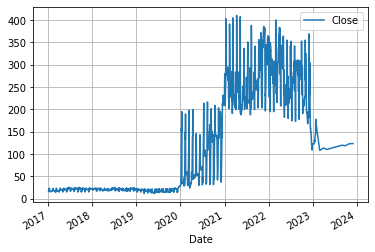

upward  57.83699059561128% out of 1276 total datasize


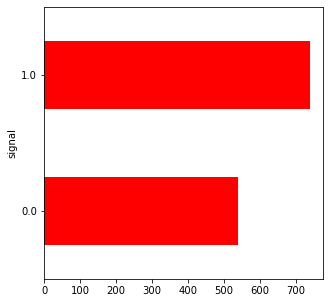

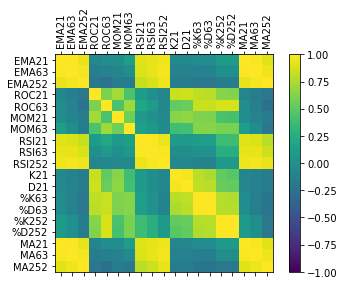

In [22]:
daily_close_px = datas[['Close']]
daily_close_px.plot(grid=True)
plt.show()

fig = plt.figure()
fig.set_size_inches(5,5)
data_s = datasubs.groupby(['signal']).size()
names=['EMA21','EMA63','EMA252','ROC21','ROC63','MOM21','MOM63','RSI21','RSI63','RSI252','K21','D21','%K63','%D63','%K252','%D252','MA21','MA63','MA252']

print("upward  {}% out of {} total datasize".format(100* data_s[1]/(data_s[1]+data_s[0]), data_s[1]+data_s[0]))
plot = data_s.plot(kind='barh', color='red')
X=datasubs.drop(['signal'], axis=1)
y=datasubs['signal']

correlations = X.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,19,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation = 90)
ax.set_yticklabels(names)
plt.show()

# FEATURE SELECTION

In [23]:
forest = RandomForestClassifier(n_estimators=500,random_state=1,n_jobs=-1)
forest.fit(X, y)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=1)

        Importance
%K21      1.496356
%D21      1.600240
MOM21     1.802180
ROC21     1.880070
%K63      1.922091
RSI21     2.647925
%D63      2.718967
MA63      3.728116
RSI63     3.860026
EMA63     4.089616
RSI252    4.170060
EMA21     4.373032
EMA252    4.915592
MA21      5.186612
MA252     6.201684
%K252     9.853121
%D252    10.969177
ROC63    14.017738
MOM63    14.567399


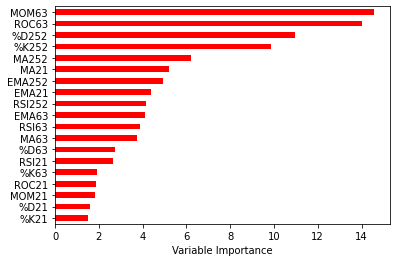

In [24]:
Importance = pd.DataFrame({'Importance':forest.feature_importances_*100}, index=X.columns)
print(Importance.sort_values('Importance', axis=0, ascending=True))
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# MACHINE LEARNING ALGORITHMS

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm,neighbors
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [26]:
X_1=datasub.drop(['signal'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X_1, y, test_size=0.2, random_state=1)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)
from sklearn.preprocessing import RobustScaler
X_train_1=X_train.drop(['Close','High','Low','Open', 'Volume','short_mavg','long_mavg'], axis=1)
X_test_1=X_test.drop(['Close','High','Low','Open', 'Volume','short_mavg','long_mavg'], axis=1)

rs = RobustScaler()
rs.fit(X_train_1)
X_train_std = rs.transform(X_train_1)
X_test_std = rs.transform(X_test_1)

(1020, 27) (1020,)
(256, 27) (256,)


In [27]:
print(X_train)
print(X_test)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-10  259.466675  260.260010  254.529999  258.406677  258.406677   
2022-01-25  304.733337  317.086670  301.070007  306.133331  306.133331   
2018-06-03   22.250000   22.424667   21.802000   21.879999   21.879999   
2018-05-29   18.567333   19.100000   18.410000   18.917334   18.917334   
2021-08-19  226.070007  228.850006  222.529999  224.490005  224.490005   
...                ...         ...         ...         ...         ...   
2020-05-11  142.766663  146.666672  141.333328  146.029999  146.029999   
2021-10-08  237.996674  238.863327  233.960007  236.663330  236.663330   
2022-12-05  233.666672  253.220001  226.666672  242.666672  242.666672   
2018-11-12   24.660667   24.811333   24.015333   24.450666   24.450666   
2022-03-23  326.646667  346.899994  325.466675  333.036682  333.036682   

               Volume  short_mavg   l

In [28]:
# Spot Check Algorithms
data_Selected = []
data_Selected.append(('KNN', KNeighborsClassifier()))
data_Selected.append(('CART', DecisionTreeClassifier()))
data_Selected.append(('SVM', SVC()))
data_Selected.append(('RF', RandomForestClassifier()))
data_Selected.append(('NB', GaussianNB()))

# evaluate each model in turn
results = []
names = []
score=['f1','accuracy','precison','recall']
for name, model in data_Selected:
    kfold = model_selection.KFold(n_splits=10)
    cv_results =cross_val_score(model, X_train_std, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    output = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(output)

KNN: 0.936275 (0.019237)
CART: 0.958824 (0.023934)
SVM: 0.897059 (0.029493)
RF: 0.982353 (0.011433)
NB: 0.780392 (0.034856)


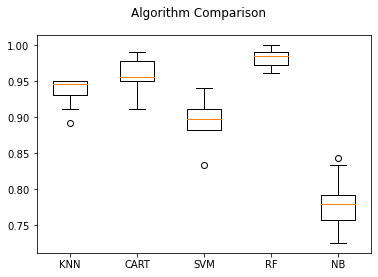

In [29]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Model Accuracy
1. K Nearest Neighbour — 93.63%
2. CART — 96.17%
3. Random Forest — 98.13%
4. Support Vector Machine — 89.71%
5. Gaussian Naïve Bayes — 78.03%

The Random Forest Model has the highest accuracy score thus can be applied for prediction

In [30]:
rf = RandomForestClassifier(n_estimators=500, min_samples_split=5,min_samples_leaf =2,max_features = 10,n_jobs=4,criterion='gini')
predy=rf.fit(X_train_std, Y_train)

In [31]:
predr= rf.predict(X_test_std)

In [32]:
print(accuracy_score(Y_test, predr))
print(confusion_matrix(Y_test, predr))
print(classification_report(Y_test, predr))

0.96484375
[[114   6]
 [  3 133]]
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       120
         1.0       0.96      0.98      0.97       136

    accuracy                           0.96       256
   macro avg       0.97      0.96      0.96       256
weighted avg       0.97      0.96      0.96       256



# PREDICTION

In [33]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix,f1_score

def pltcm(ax, y_test, y_pred, classes, title, th=0.7, cmap=plt.cm.Reds):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_test, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tickmarks = np.arange(len(classes))
    ax.set_xticks(tickmarks)
    ax.set_yticks(tickmarks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('Actual')
    ax.set_xlabel('Prediction')

def pltauc(ax, y_train, y_pred, y_test, y_tpred, th=0.7):

    y_predl = (y_pred>th).astype(int)
    y_tpredl  = (y_tpred>th).astype(int)

    fpr_tr, tpr_tr, _ = roc_curve(y_train,y_pred)
    roc_auc_tr = auc(fpr_tr, tpr_tr)
    acc_tr = accuracy_score(y_train, y_predl)

    fpr_ts, tpr_ts, _ = roc_curve(y_test,y_tpred)
    roc_auc_ts = auc(fpr_ts, tpr_ts)
    acc_ts = accuracy_score(y_test, y_tpredl)

    ax.plot(fpr_tr, tpr_tr)
    ax.plot(fpr_ts, tpr_ts)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_tr, roc_auc_tr)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_ts, roc_auc_ts)
    ax.legend([train_text, test_text])

def result(es,threshold,X_train,X_test,y_train,y_test):
    y_pred = es.predict(X_train)
    y_tpred = es.predict(X_test)

    fig,ax = plt.subplots(1,3)
    fig.set_size_inches(15,5)
    pltcm(ax[0],  y_train, y_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
    pltcm(ax[1],  y_test, y_tpred,   [0,1], 'Confusion matrix (TEST)', threshold)
    pltauc(ax[2], y_train, y_pred, y_test, y_tpred, threshold)
    plt.tight_layout()
    plt.show()
    
def btf1(es,X_test,y_test):
    thresholds = np.linspace(0.3,0.6,100)
    y_tpred = es.predict(X_test)
    score_set = []
    index_threshold = 0
    sum_score = 0
    for threshold in thresholds:
        y_tpred1  = (y_tpred > threshold).astype(int)
        score = f1_score(y_test, y_tpred1)
        score_set.append(score)
    for i in range(95):
        temp = sum(score_set[i:i+5])
        if temp > sum_score:
            sum_score = temp
            index_threshold = i+2 # the average threshold
    return thresholds[index_threshold],sum_score/5

def testf1(es,bestthreshold,X_test,y_test):
    y_tpred = es.predict(X_test)
    y_tpred1  = (y_tpred > bestthreshold).astype(int)
    score = f1_score(y_test, y_tpred1)
    return score

test f1: 0.9672727272727273 train f1: 1.0


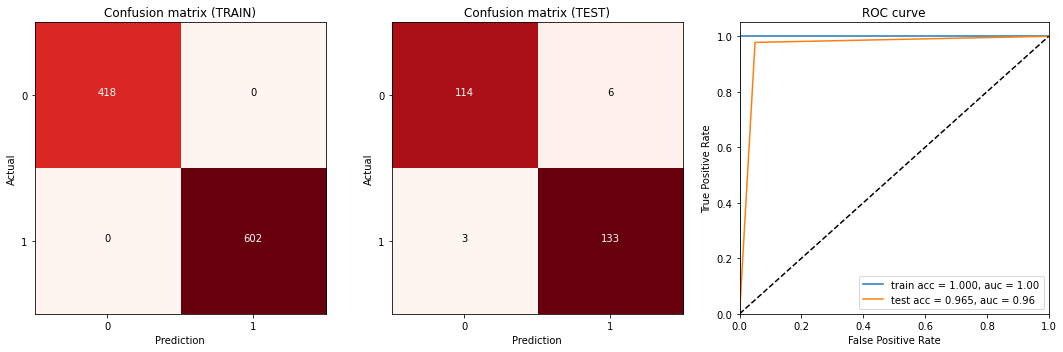

In [34]:
bestthreshold,bestf1 = btf1(rf,X_train_std, Y_train)
testf1 = testf1(rf,bestthreshold,X_test_std,Y_test)
print('test f1:',testf1,'train f1:',bestf1)
result(rf,bestthreshold,X_train_std,X_test_std, Y_train,Y_test)

signal_pred  signal_actual  Market Returns  Actual Returns  \
Date                                                                     
2018-02-05          0.0            0.0             NaN             NaN   
2021-04-02          1.0            1.0       13.112401        0.000000   
2019-05-29          0.0            0.0       -0.955327       -0.955327   
2021-07-23          0.0            0.0       15.943538        0.000000   
2018-06-09          1.0            1.0       -0.912664       -0.000000   

            Strategy Returns  
Date                          
2018-02-05               NaN  
2021-04-02          0.000000  
2019-05-29         -0.955327  
2021-07-23          0.000000  
2018-06-09         -0.000000

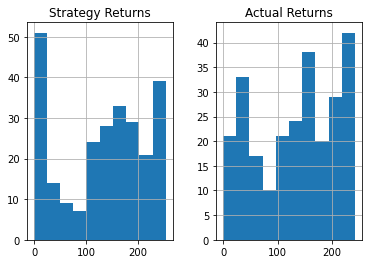

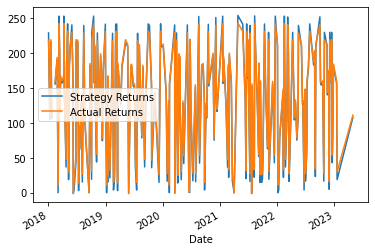

In [35]:
#Create column for Strategy Returns by multiplying the daily returns by the position that was held at close
#of business the previous day
backtestdata = pd.DataFrame(index=X_test.index)
backtestdata['signal_pred'] = predr
backtestdata['signal_actual'] = Y_test
backtestdata['Market Returns'] = X_test['Close'].pct_change()
backtestdata['Actual Returns'] = backtestdata['Market Returns'] * backtestdata['signal_actual'].shift(1)
backtestdata['Strategy Returns'] = backtestdata['Market Returns'] * backtestdata['signal_pred'].shift(1)
backtestdata[['Strategy Returns','Actual Returns']].cumsum().hist()
backtestdata[['Strategy Returns','Actual Returns']].cumsum().plot()
backtestdata.head()

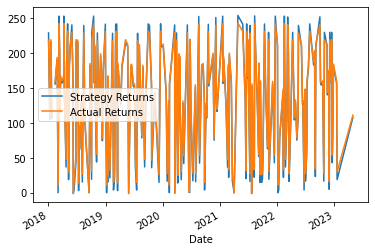

In [36]:
ax = backtestdata[['Strategy Returns','Actual Returns']].cumsum().plot()
plt.xticks(rotation=30)
plt.show()

# CONCLUSION

# REFERENCES